In [1]:
#!wget --no-parent -r 

In [2]:
#!ls

In [1]:
!unzip -u /content/drive/MyDrive/data/2021-01.zip
!unzip -u /content/drive/MyDrive/data/2021-06.zip

Archive:  /content/drive/MyDrive/data/2021-01.zip
Archive:  /content/drive/MyDrive/data/2021-06.zip


In [2]:
!pip install eo-learn

In [3]:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, FeatureType, OverwritePermission,LoadTask, SaveTask, EOExecutor, ExtractBandsTask, MergeFeatureTask
import os
import numpy as np

In [4]:
directory_list = list()
for root, dirs, files in os.walk("/content/2021-01", topdown=False):
    for name in dirs:
        directory_list.append(os.path.join(root, name))
print(directory_list[0])

/content/2021-01/1c225e71-2037-4159-8858-4c7744b2789f/sentinel2-l2a/patches/64x64-10/2021/mask


In [5]:
data = []
for i in directory_list:
  if(len(i) <= len('/content/2021-01/1c225e71-2037-4159-8858-4c7744b2789f')):
    data.append(EOPatch.load(i + '/sentinel2-l2a/patches/64x64-10/2021', lazy_loading=True))

In [6]:
directory_list = list()
for root, dirs, files in os.walk("/content/2021-06", topdown=False):
    for name in dirs:
        directory_list.append(os.path.join(root, name))
print(directory_list[3])

/content/2021-06/РН-СНГ-2013-832/data


In [7]:
for i in directory_list:
  if(len(i) <= len('/content/2021-06/РН-СНГ-2013-8440')):
    data.append(EOPatch.load(i, lazy_loading=True))

In [8]:
print(len(data), type(data))

1691 <class 'list'>


In [9]:
data_x = []
for i in range(len(data)):
  data_x.append(data[i]['data']['L2A'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

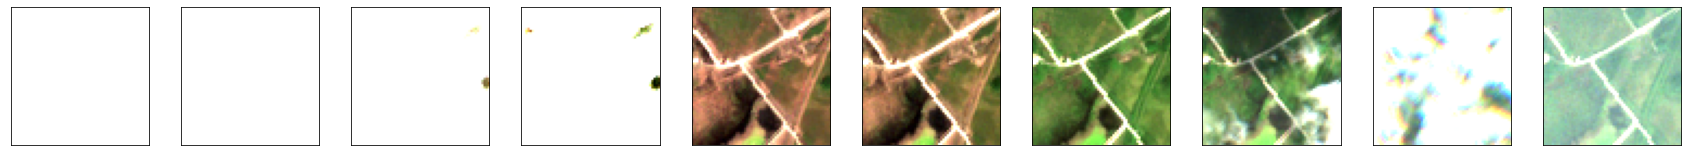

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

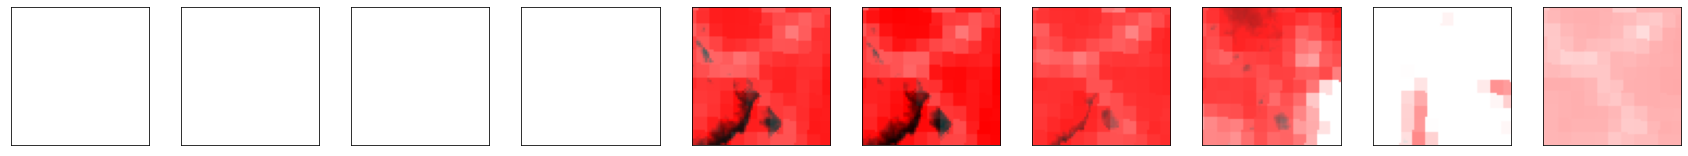

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

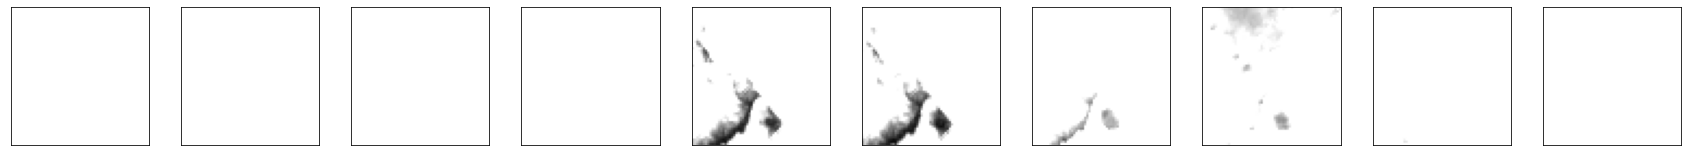

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
for i in range(0,10):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(data_x[1300][i][..., [3, 2, 1]])
plt.show()
plt.figure(figsize=(30,30))
for i in range(0,10):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(data_x[1300][i][..., [7, 0, 0]])
plt.show()
plt.figure(figsize=(30,30))
for i in range(0,10):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(data_x[1300][i][..., [7, 7, 7]])

In [41]:
data_coor = []
for i in range(len(data)):
  data_coor.append(data[i]['bbox'])

In [44]:
data_timestamp = []
for i in range(len(data)):
  data_timestamp.append(data[i]['timestamp'])

In [96]:
data_y = []
for i in range(len(data)):
  data_y.append(data[i]['mask']['CLP'])

In [42]:
print(data_coor[1200])

76.3775449965913,61.281036727442874,76.38973409317842,61.28665899444801


In [60]:
data_timestamp[1200]

[datetime.datetime(2021, 1, 19, 6, 22, 5, tzinfo=tzlocal()),
 datetime.datetime(2021, 4, 9, 6, 21, 56, tzinfo=tzlocal()),
 datetime.datetime(2021, 5, 9, 6, 22, 11, tzinfo=tzlocal()),
 datetime.datetime(2021, 5, 22, 6, 31, 57, tzinfo=tzlocal()),
 datetime.datetime(2021, 6, 13, 6, 22, tzinfo=tzlocal()),
 datetime.datetime(2021, 7, 3, 6, 22, 15, tzinfo=tzlocal()),
 datetime.datetime(2021, 7, 6, 6, 32, 13, tzinfo=tzlocal()),
 datetime.datetime(2021, 8, 12, 6, 22, 2, tzinfo=tzlocal()),
 datetime.datetime(2021, 9, 26, 6, 21, 58, tzinfo=tzlocal()),
 datetime.datetime(2021, 10, 31, 6, 22, 4, tzinfo=tzlocal()),
 datetime.datetime(2021, 11, 3, 6, 32, 15, tzinfo=tzlocal())]

In [61]:
data

EOPatch(
  data: {
    L2A: numpy.ndarray(shape=(26, 64, 64, 13), dtype=float32)
  }
  mask: {
    CLD: FeatureIO(/mask/CLD.npy.gz)
    CLM: FeatureIO(/mask/CLM.npy.gz)
    CLP: FeatureIO(/mask/CLP.npy.gz)
    IS_DATA: FeatureIO(/mask/IS_DATA.npy.gz)
    SCL: FeatureIO(/mask/SCL.npy.gz)
    SNW: FeatureIO(/mask/SNW.npy.gz)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.2
    resolution: 10
    size_x: 64
    size_y: 64
    time_difference: datetime.timedelta(seconds=3600)
    time_interval: (datetime.datetime(2021, 6, 1, 0, 0), datetime.datetime(2021, 12, 31, 23, 59, 59))
  }
  bbox: BBox(((72.38736963373358, 61.00338848052508), (72.39872193546852, 61.009356978929524)), crs=CRS('4326'))
  timestamp: [datetime.datetime(2021, 6, 9, 6, 42, 21, tzinfo=tzlocal()), ...], length=26
)

In [109]:
(data_x[1300]/data_x[1300].max()).max()

1.0

In [62]:
len(data_x)

1691

In [63]:
type(data_x)

list

In [64]:
data_x[0].shape

(26, 64, 64, 13)

In [70]:
a = 0
for i in range(len(data)):
  if data[i]['bbox'] != "":
    a += 1

In [71]:
a

1691

In [84]:
data_coor[1200]

BBox(((76.3775449965913, 61.281036727442874), (76.38973409317842, 61.28665899444801)), crs=CRS('4326'))

In [100]:
print(type(data_x[0]), type(data_y[0]))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [104]:
from keras.models import Model
from keras import backend as K

from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Convolution2D, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

def unet4(image_rows, image_cols, img_channels):
	inputs = Input((image_rows, image_cols, img_channels))
	conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
	conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
	pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

	conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
	conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
	pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

	conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
	conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
	pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

	conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
	conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
	pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

	conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
	conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

	up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=1)
	conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
	conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

	up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=1)
	conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
	conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

	up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=1)
	conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
	conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

	up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=1)
	conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
	conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

	conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

	model = Model(inputs=[inputs], outputs=[conv10])
	
	model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

	return model

In [137]:
from eolearn.ml_tools import ImageClassificationMaskTask

In [ ]:
ImageClassificationMaskTask